# Importando librerías

In [58]:
import os
import warnings
import random


import pandas as pd
import numpy as np
import pandas as pd
import prince
import pprint
import umap as umap
import umap.umap_ as umap
from lightgbm import LGBMClassifier
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import PowerTransformer



warnings.filterwarnings('ignore')

/home/elchristog/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Lectura de datos

In [59]:
path = 'data/'
file = 'muestraDatosFullLimpiosUniviariado.csv'
df = pd.read_csv(path+file, index_col=0)
df.head()

,index,Unnamed: 0,Id_Afiliado,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,TipoIdentificacion_datos,...,Discapacidad_datos,Etnia_datos,NivelEducativo_datos,TipoIdentificacion_idFalsos,Regimen,Condicion_Cronica_idSalud,NivelRiesgo_idSalud,Discapacidad_idSalud,Etnia_idSalud,NivelEducativo_idSalud
0,5163688,5163688,6511137.0,3427938,3427938,3428411,3429070,3429070,3429070,TI,...,NaN,NaN,NaN,TI,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
1,481890,481890,607914.0,1715757,1715757,1715992,1716315,1716315,1716315,CC,...,NaN,NaN,NaN,CC,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,BASICA SECUNDARIA
2,1617671,1617671,2039742.0,5751448,5751448,5752000,5752796,5752796,5752796,RC,...,NaN,NaN,NaN,RC,SUBSIDIADO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
3,4594758,4594758,5794516.0,3395522,3395522,3395995,3396651,3396651,3396651,TI,...,NaN,NaN,NaN,TI,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
4,2537788,2537788,3200242.0,3431598,3431598,3432071,3432730,3432730,3432730,TI,...,NaN,NaN,NaN,TI,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO


# Limpieza de datos

In [60]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(df.shape)

df = df.drop(columns=['TipoIdentificacion_datos', 'Nombre', 'Apellido 1', 'Apellido 2', 'idFalso', 'Regimen', 'Telfono celular Nacional',
       'Telfono celular (Cabecera Mpal)',
       'Telfono celular (Centro Poblado y Rural)',
       'Computador de escritorio Nacional',
       'Computador de escritorio (Cabecera Mpal)',
       'Computador de escritorio (Centro Poblado y Rural)',
       'Computador porttil Nacional', 'Computador porttil (Cabecera Mpal)',
       'Computador porttil (Centro Poblado y Rural)', 'Tableta Nacional',
       'Tableta (Cabecera Mpal)', 'Tableta (Centro Poblado y Rural)',
       'Otros dispositivos Nacional', 'Otros dispositivos (Cabecera Mpal)',
       'Otros dispositivos (Centro Poblado y Rural)', 'TELEFONO', 'CorreoElectronico', 'CodigoDane', 'TipoIdentificacion_idFalsos', 'Condicion_Cronica_datos',
       'NivelRiesgo_datos', 'Discapacidad_datos', 'Etnia_datos',
       'NivelEducativo_datos'])

print(df.columns)

df.head()

(1044692, 71)
Index(['index', 'Id_Afiliado', 'FechaNacimiento', 'Genero', 'TipoAfiliado',
       'Regionales', 'Zonales', 'Departamento', 'Municipios', 'Zonas',
       'REGIMEN', 'AfilidoPAC', 'Edades', 'Generacion', 'PQRS 2020',
       'Multiquejoso', 'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea', 'Digitalizacion generacion', 'categoriaNivelDePQRS',
       'categoriaNivelDeUsoPortalWeb', 'categoriaNivelDeUsoAPP',
       'categoriaNivelDeUsoCallCenter', 'categoriaNivelDeUsoOAA',
       'categoriaNivelDeUsoAsesorAClic', 'categoriaNivelDeUsoChatEnLinea',
       'categoriaNivelDeUsoIVR', 'digitalizacionOficial', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud'],
      dtype='object')


,index,Id_Afiliado,FechaNacimiento,Genero,TipoAfiliado,Regionales,Zonales,Departamento,Municipios,Zonas,...,categoriaNivelDeUsoChatEnLinea,categoriaNivelDeUsoIVR,digitalizacionOficial,mujerEnEdadFertil,categoriaNivelDeDigitalizacionOficial,Condicion_Cronica_idSalud,NivelRiesgo_idSalud,Discapacidad_idSalud,Etnia_idSalud,NivelEducativo_idSalud
0,5163688,6511137.0,05/07/2011,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,BAJO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
1,481890,607914.0,02/10/1972,F,COTIZANTE,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,MEDIO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,BASICA SECUNDARIA
2,1617671,2039742.0,27/08/2016,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,BAJO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
3,4594758,5794516.0,17/07/2012,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,BAJO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
4,2537788,3200242.0,15/09/2009,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,BAJO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO


# Descriptivos

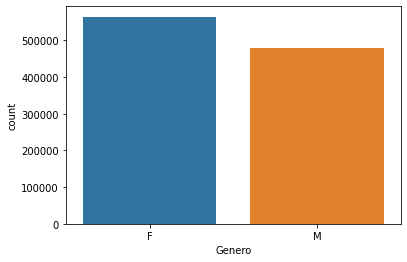

F    564497
M    480195
Name: Genero, dtype: int64


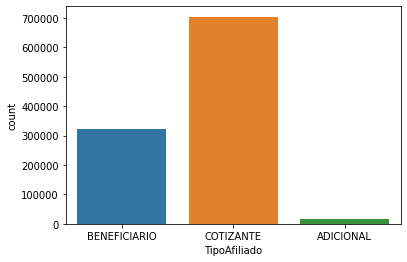

COTIZANTE       704503
BENEFICIARIO    324046
ADICIONAL        16143
Name: TipoAfiliado, dtype: int64


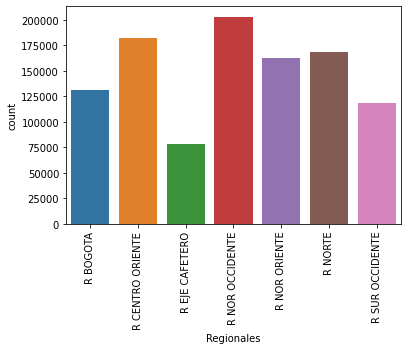

R NOR OCCIDENTE     202918
R CENTRO ORIENTE    181905
R NORTE             168773
R NOR ORIENTE       162853
R BOGOTA            131575
R SUR OCCIDENTE     118081
R EJE CAFETERO       78587
Name: Regionales, dtype: int64


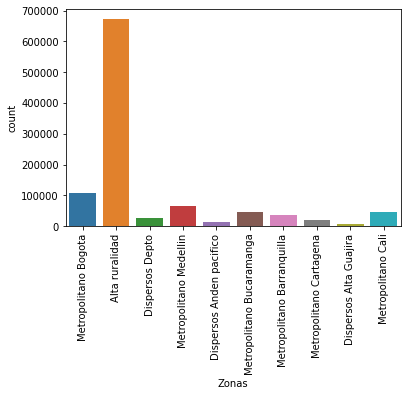

Alta ruralidad                673171
Metropolitano Bogota          108908
Metropolitano Medellin         64952
Metropolitano Bucaramanga      47174
Metropolitano Cali             46226
Metropolitano Barranquilla     36682
Dispersos Depto                26565
Metropolitano Cartagena        20634
Dispersos Anden pacifico       13241
Dispersos Alta Guajira          7139
Name: Zonas, dtype: int64


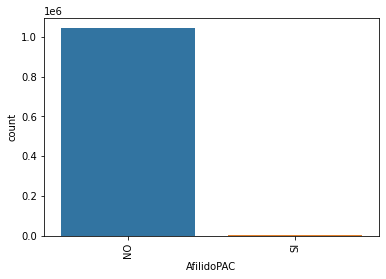

NO    1043279
SI       1413
Name: AfilidoPAC, dtype: int64


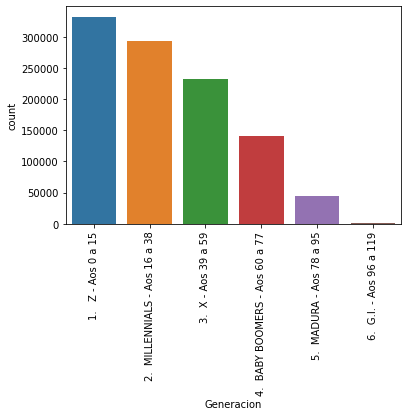

1.   Z - Aos 0 a 15               332021
2.  MILLENNIALS - Aos 16 a 38     293019
3.  X - Aos 39 a 59               232832
4.  BABY BOOMERS - Aos 60 a 77    140184
5.  MADURA - Aos 78 a 95           45041
6.  G.I. - Aos 96 a 119             1595
Name: Generacion, dtype: int64


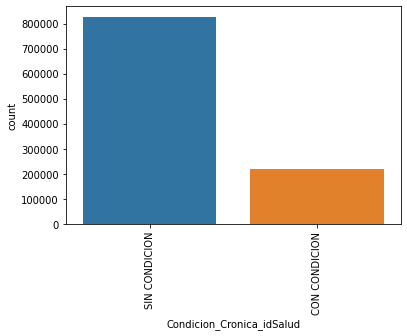

SIN CONDICION    826918
CON CONDICION    217774
Name: Condicion_Cronica_idSalud, dtype: int64


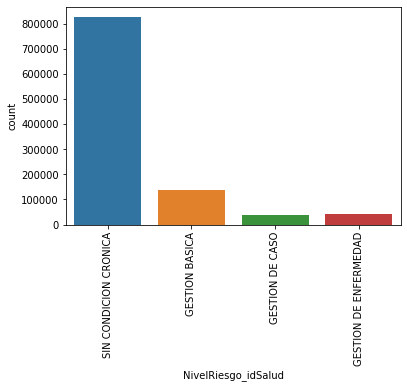

SIN CONDICION CRONICA    826918
GESTION BASICA           139364
GESTION DE ENFERMEDAD     41658
GESTION DE CASO           36752
Name: NivelRiesgo_idSalud, dtype: int64


In [61]:
# barplot of Genero
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Genero', data=df)
plt.show()
print(df['Genero'].value_counts())


# barplot of TipoAfiliado
sns.countplot(x='TipoAfiliado', data=df)
plt.show()
print(df['TipoAfiliado'].value_counts())

# barplot of Regionales
sns.countplot(x='Regionales', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Regionales'].value_counts())

# barplot of Zonas
sns.countplot(x='Zonas', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Zonas'].value_counts())

# barplot of AfilidoPAC
sns.countplot(x='AfilidoPAC', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['AfilidoPAC'].value_counts())

# barplot of Generacion
sns.countplot(x='Generacion', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Generacion'].value_counts())

# barplot of Condicion_Cronica_idSalud
sns.countplot(x='Condicion_Cronica_idSalud', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Condicion_Cronica_idSalud'].value_counts())

# barplot of NivelRiesgo_idSalud
sns.countplot(x='NivelRiesgo_idSalud', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['NivelRiesgo_idSalud'].value_counts())



# AD hoc con muestra estratificada

In [62]:
# df_adhoc = df.sample(n=1000, random_state=42)
# df_adhoc = df_adhoc.reset_index(drop=True)
# df_adhoc.head()

df_adhoc, df_test = train_test_split(df, test_size=0.99, random_state=42, stratify=df[['Genero', 'TipoAfiliado', 'Regionales', 'REGIMEN']])
df_adhoc = df_adhoc.dropna()
df_adhoc = df_adhoc.reset_index(drop=True)
df_adhoc.shape

(7497, 41)

# Aplicación de embeddings gracias a las ventajas que descubrimos respecto a ACP y ACPMix

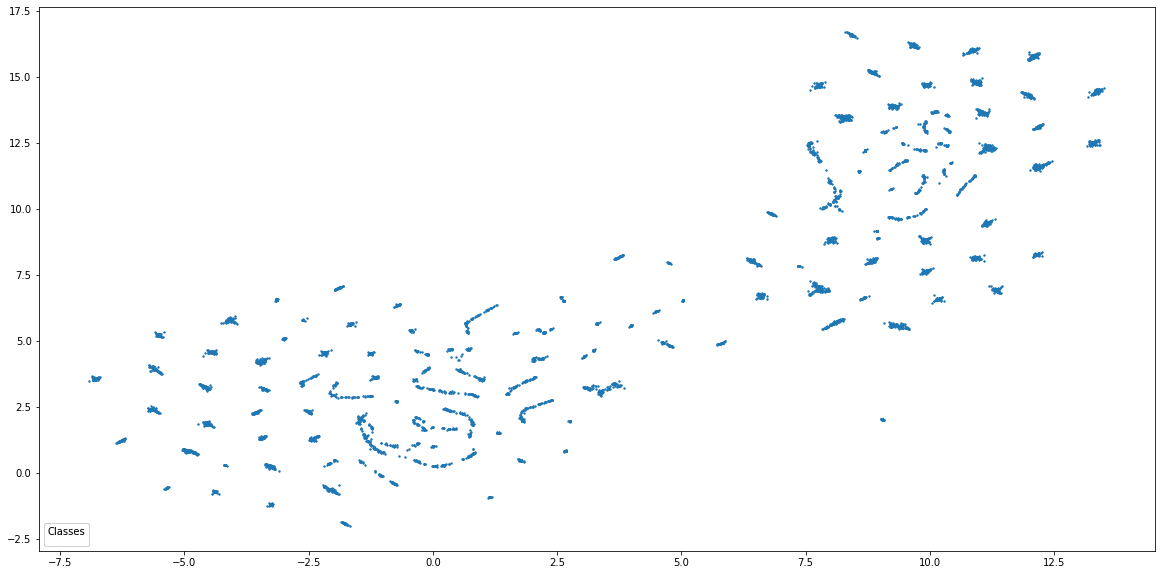

In [63]:
df_numerical = df_adhoc[['Edades','PQRS 2020',
       'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea']]
df_numerical.head()

scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns)
df_numerical_scaled.head()

df_categorical = df_adhoc[['Genero', 'TipoAfiliado', 'Regionales', 'Departamento',
       'Municipios', 'Zonas', 'REGIMEN', 'AfilidoPAC', 'Multiquejoso', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud']]
df_categorical.head()

df_new = pd.concat([df_numerical_scaled, df_categorical], axis=1)
df_new.head()



numerical = df_new.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))

categorical = df_new.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)


categorical_weight = len(df_new.select_dtypes(include='object').columns) / df_new.shape[1]
categorical_weight

intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,fit1._initial_alpha, fit1._a, fit1._b,fit1.repulsion_strength, fit1.negative_sample_rate,200, 'random', np.random, fit1.metric, fit1._metric_kwds, False,{},False)

uno=[]
dos=[]

for i in embedding[0]:
    uno.append(i[0])
    dos.append(i[1])


fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
#scatter = ax.scatter(embedding[:,0], embedding[:,1], s=2, c=clusters, cmap='tab20b', alpha=1.0)
scatter = ax.scatter(uno, dos, s=2, cmap='tab20b', alpha=1.0)

legend1 = ax.legend(*scatter.legend_elements(num=15),loc="lower left", title="Classes")
ax.add_artist(legend1)

# DBSCAN sobre embeddings

0.02437802350160585


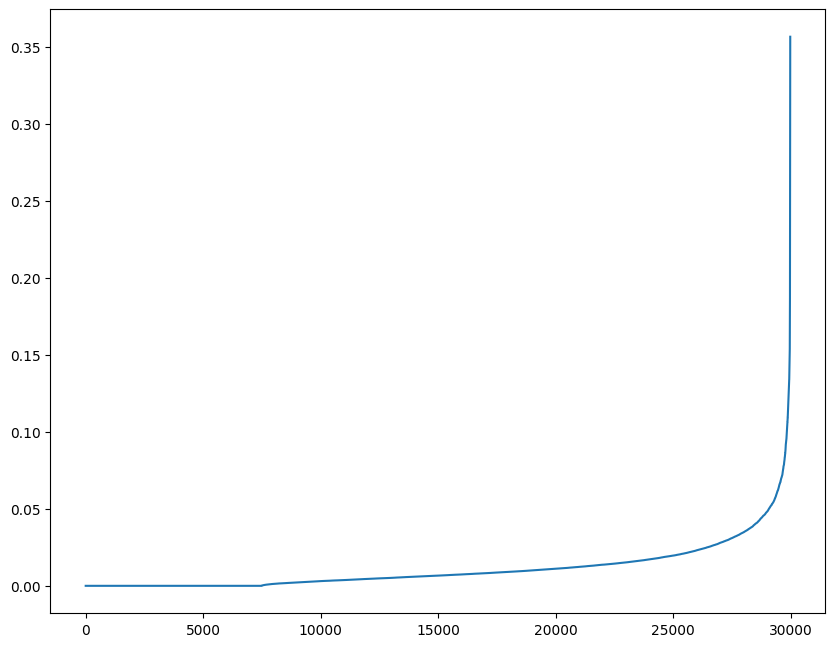

In [72]:
embedding
embedding_df = pd.DataFrame(embedding[0], columns=['x', 'y'])

neigh = NearestNeighbors(n_neighbors = 4)
nbrs = neigh.fit(embedding_df)
distancias, indices = nbrs.kneighbors(embedding_df)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(distancias)

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])

In [78]:
db = DBSCAN(eps = distancias[knee.knee], min_samples=4)
clusters_std = db.fit_predict(embedding_df)
print('Num clusters: {}'.format(len(set(clusters_std))))

Num clusters: 283


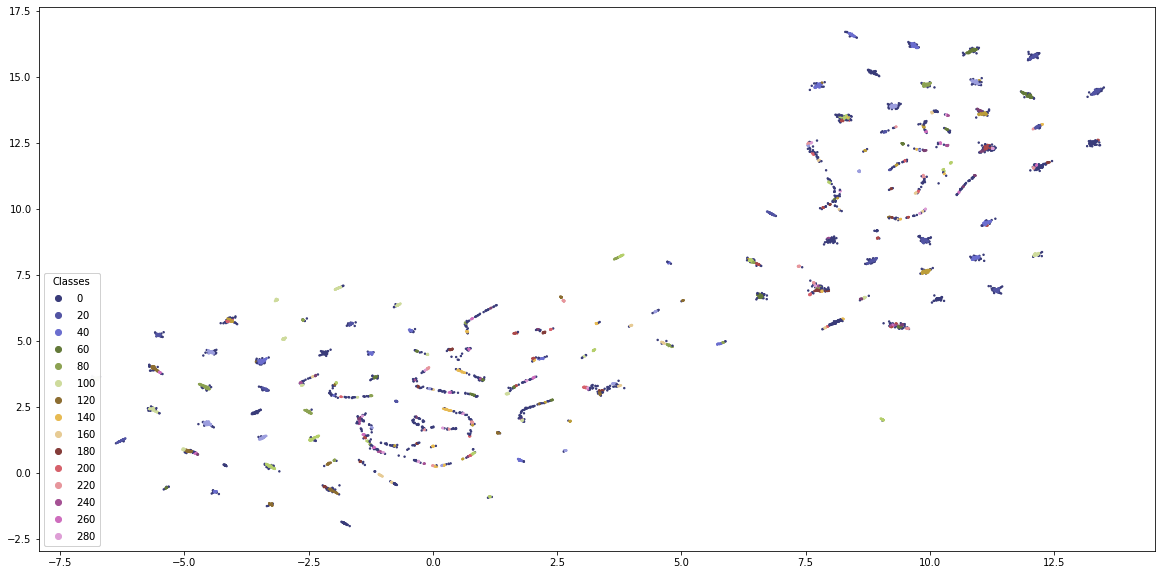

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
#scatter = ax.scatter(embedding[:,0], embedding[:,1], s=2, c=clusters, cmap='tab20b', alpha=1.0)
scatter = ax.scatter(uno, dos, s=2, c=clusters_std, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=15),loc="lower left", title="Classes")
ax.add_artist(legend1)

In [80]:
silhouette_score(embedding_df, clusters_std)

0.47972247

# DBSCAN con variables originales sin PCA

## Escalado de datos numéricos y codificación de variables categóricas

In [147]:
df_numerical = df_adhoc[['Edades','PQRS 2020',
       'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea']]
df_numerical.head()

scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns)
df_numerical_scaled.head()

df_categorical = df_adhoc[['Genero', 'TipoAfiliado', 'Regionales', 'Departamento',
       'Municipios', 'Zonas', 'REGIMEN', 'AfilidoPAC', 'Multiquejoso', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud']]
df_categorical.head()

df_categorical = pd.get_dummies(df_categorical, drop_first=True)
df_categorical.head()

,Genero_M,TipoAfiliado_BENEFICIARIO,TipoAfiliado_COTIZANTE,Regionales_R CENTRO ORIENTE,Regionales_R EJE CAFETERO,Regionales_R NOR OCCIDENTE,Regionales_R NOR ORIENTE,Regionales_R NORTE,Regionales_R SUR OCCIDENTE,Departamento_ANTIOQUIA,...,NivelEducativo_idSalud_ESPECIALIZACION,NivelEducativo_idSalud_MAESTRIA,NivelEducativo_idSalud_MEDIA ACADEMICA O CLASICA,NivelEducativo_idSalud_MEDIA TECNICA (BACHILLERATO TECNICO),NivelEducativo_idSalud_NINGUNO,NivelEducativo_idSalud_NORMALISTA,NivelEducativo_idSalud_PREESCOLAR,NivelEducativo_idSalud_PROFESIONAL,NivelEducativo_idSalud_TECNICA PROFESIONAL,NivelEducativo_idSalud_TECNOLOGICA
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
df_new = pd.concat([df_numerical_scaled, df_categorical], axis=1)
df_new = df_new.dropna()
df_new.head()

,Edades,PQRS 2020,PortalWeb 2020,APP 2020,CallCenter 2020,OAA 2020,AsesorAClic 2020,ViveDigital 2020,IVR 2020,ChatEnLinea,...,NivelEducativo_idSalud_ESPECIALIZACION,NivelEducativo_idSalud_MAESTRIA,NivelEducativo_idSalud_MEDIA ACADEMICA O CLASICA,NivelEducativo_idSalud_MEDIA TECNICA (BACHILLERATO TECNICO),NivelEducativo_idSalud_NINGUNO,NivelEducativo_idSalud_NORMALISTA,NivelEducativo_idSalud_PREESCOLAR,NivelEducativo_idSalud_PROFESIONAL,NivelEducativo_idSalud_TECNICA PROFESIONAL,NivelEducativo_idSalud_TECNOLOGICA
0,-0.787255,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,0,0,0,0,1,0,0,0,0,0
1,-0.635546,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,0,0,0,0,1,0,0,0,0,0
2,-0.433267,-0.112592,1.642778,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,0,0,0,0,0,0,0,1,0,0
3,-0.584976,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,0,0,0,0,1,0,0,0,0,0
4,1.892945,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,0,0,0,0,0,0,0,0,0,0


## Elbow

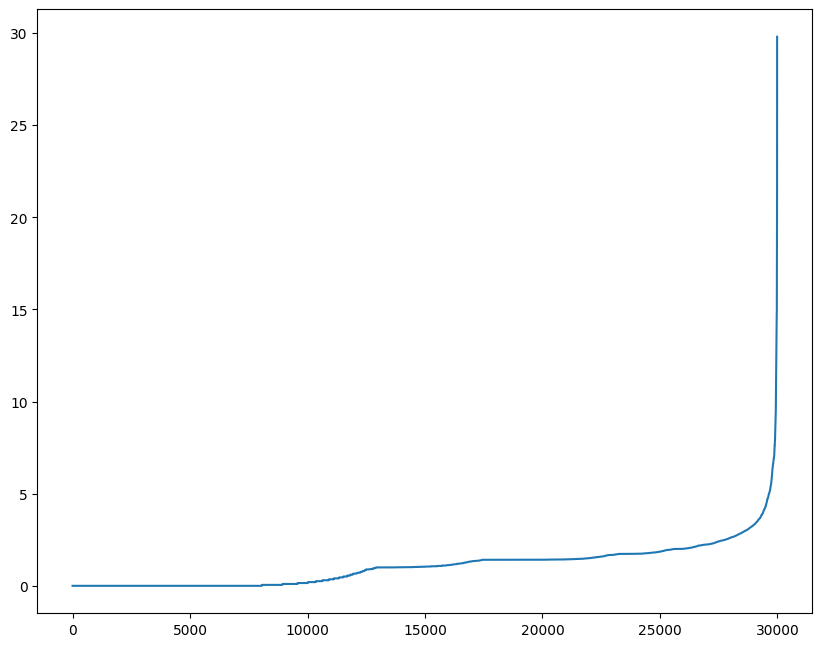

In [154]:
neigh = NearestNeighbors(n_neighbors = 4)
nbrs = neigh.fit(df_new)
distancias, indices = nbrs.kneighbors(df_new)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(distancias)

In [155]:
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])

2.160812778340755


In [156]:
db = DBSCAN(eps = distancias[knee.knee], min_samples=10)
clusters_std = db.fit_predict(df_new)
print('Num clusters: {}'.format(len(set(clusters_std))))

Num clusters: 4


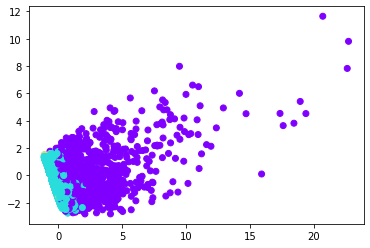

In [157]:
pca = PCA(n_components=2)

cPrincipales=pca.fit_transform(df_new)
cPrincipalesDF = pd.DataFrame(data = cPrincipales, columns = ['ComponentePrincipal1', 'ComponentePrincipal2'])
plt.scatter(cPrincipalesDF['ComponentePrincipal1'], cPrincipalesDF['ComponentePrincipal2'], c = clusters_std, cmap='rainbow')
plt.show()

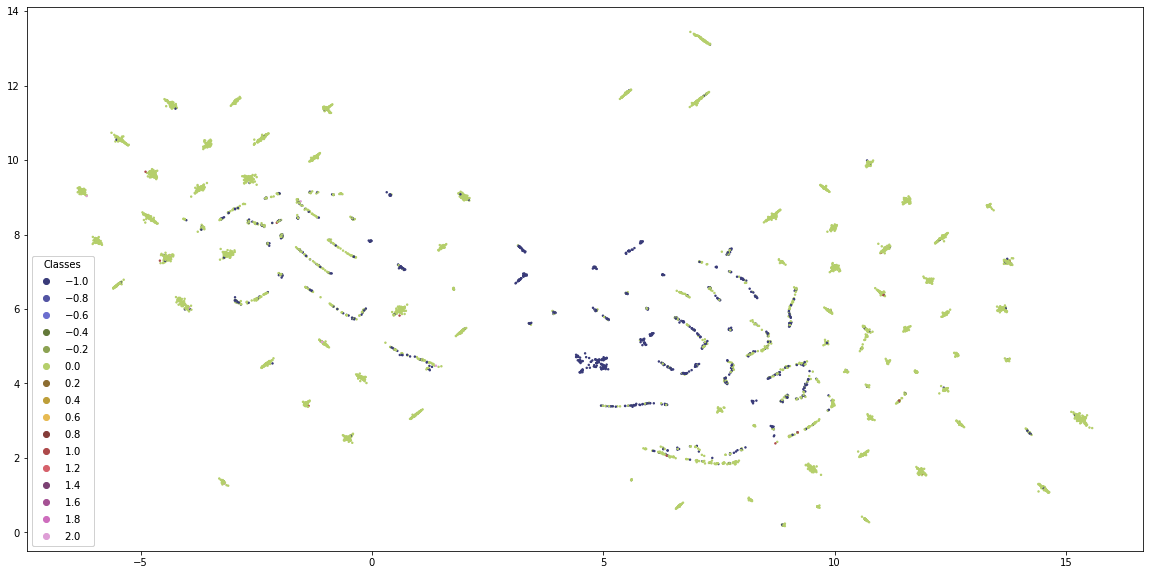

In [159]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
#scatter = ax.scatter(embedding[:,0], embedding[:,1], s=2, c=clusters, cmap='tab20b', alpha=1.0)
scatter = ax.scatter(uno, dos, s=2, c=clusters_std, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=15),loc="lower left", title="Classes")
ax.add_artist(legend1)

## Silueta

In [158]:
silhouette_score(df_new, clusters_std)

-0.052969460890157596

# K-prototipos

## Elbow

In [85]:
df_numerical = df_adhoc[['Edades','PQRS 2020',
       'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea']]
df_numerical.head()

scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns)
df_numerical_scaled.head()

df_categorical = df_adhoc[['Genero', 'TipoAfiliado', 'Regionales', 'Departamento',
       'Municipios', 'Zonas', 'REGIMEN', 'AfilidoPAC', 'Multiquejoso', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud']]
df_categorical.head()

df_new = pd.concat([df_numerical_scaled, df_categorical], axis=1)
df_new.head()

,Edades,PQRS 2020,PortalWeb 2020,APP 2020,CallCenter 2020,OAA 2020,AsesorAClic 2020,ViveDigital 2020,IVR 2020,ChatEnLinea,...,REGIMEN,AfilidoPAC,Multiquejoso,mujerEnEdadFertil,categoriaNivelDeDigitalizacionOficial,Condicion_Cronica_idSalud,NivelRiesgo_idSalud,Discapacidad_idSalud,Etnia_idSalud,NivelEducativo_idSalud
0,-0.787255,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,SUBSIDIADO,NO,NO,SI,ALTO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
1,-0.635546,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,Contributivo,NO,NO,SI,ALTO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
2,-0.433267,-0.112592,1.642778,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,Contributivo,NO,NO,SI,ALTO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,PROFESIONAL
3,-0.584976,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,Contributivo,NO,NO,SI,ALTO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
4,1.892945,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,Contributivo,NO,NO,NO,MEDIO,CON CONDICION,GESTION BASICA,SIN DISCAPACIDAD,"NEGRO(A), MULATO(A), AFROCOLOMBIANO(A) O AFRO ...",BASICA PRIMARIA


In [86]:
categorical_columns = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
kproto = KPrototypes(n_clusters= 15, init='Cao', n_jobs = -1)
clusters = kproto.fit_predict(df_new, categorical=categorical_columns)
pd.Series(clusters).value_counts()

9     3283
7     2305
8     1156
11     219
14     153
6       83
3       72
4       69
0       64
2       34
12      24
1       15
5       10
13       5
10       5
dtype: int64

In [87]:
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 25)):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters = kproto.fit_predict(df_new, categorical=categorical_columns)
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

  0%|          | 0/23 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1317, ncost: 88240.3302488645
Run: 1, iteration: 2/100, moves: 206, ncost: 88170.66004162267
Run: 1, iteration: 3/100, moves: 39, ncost: 88168.3202738961
Run: 1, iteration: 4/100, moves: 3, ncost: 88168.2369983756
Run: 1, iteration: 5/100, moves: 0, ncost: 88168.2369983756
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 690, ncost: 88467.93305190142
Run: 2, iteration: 2/100, moves: 585, ncost: 88212.10964207236
Run: 2, iteration: 3/100, moves: 181, ncost: 88154.07827567264
Run: 2, iteration: 4/100, moves: 89, ncost: 88153.6782714501
Run: 2, iteration: 5/100, moves: 0, ncost: 88153.6782714501
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 266, ncost: 86266.07257122552
Run:

  4%|▍         | 1/23 [01:21<29:54, 81.55s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 739, ncost: 82779.68943857173
Run: 1, iteration: 2/100, moves: 184, ncost: 81924.25909572822
Run: 1, iteration: 3/100, moves: 88, ncost: 81665.29663541626
Run: 1, iteration: 4/100, moves: 61, ncost: 81549.91930025857
Run: 1, iteration: 5/100, moves: 57, ncost: 81387.84346297909
Run: 1, iteration: 6/100, moves: 29, ncost: 81378.9799824863
Run: 1, iteration: 7/100, moves: 4, ncost: 81378.65291999924
Run: 1, iteration: 8/100, moves: 0, ncost: 81378.65291999924
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 737, ncost: 83463.36129163393
Run: 2, iteration: 2/100, moves: 237, ncost: 82181.53691499976
Run: 2, iteration: 3/100, moves: 116, ncost: 81618.60357349223
Run: 2, iteration: 4/100, moves: 52, ncost: 81443.00510055662
Run: 2, iteration:

  9%|▊         | 2/23 [03:39<40:13, 114.94s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1181, ncost: 76196.27016270932
Run: 1, iteration: 2/100, moves: 280, ncost: 75502.61196599071
Run: 1, iteration: 3/100, moves: 123, ncost: 75091.63366491886
Run: 1, iteration: 4/100, moves: 63, ncost: 74748.62797949795
Run: 1, iteration: 5/100, moves: 56, ncost: 74561.81381767083
Run: 1, iteration: 6/100, moves: 34, ncost: 74372.00793433179
Run: 1, iteration: 7/100, moves: 40, ncost: 74040.60176562885
Run: 1, iteration: 8/100, moves: 19, ncost: 73986.01320246971
Run: 1, iteration: 9/100, moves: 0, ncost: 73986.01320246971
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 469, ncost: 77620.87294022882
Run: 2, iteration: 2/100, moves: 123, ncost: 77280.46982749703
Run: 2, iteration: 3/100, moves: 62, ncost: 77155.96366809975
Run: 2, iterati

 13%|█▎        | 3/23 [07:07<52:24, 157.22s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2571, ncost: 73674.1106223123
Run: 1, iteration: 2/100, moves: 419, ncost: 73006.58720358169
Run: 1, iteration: 3/100, moves: 319, ncost: 72891.14466793681
Run: 1, iteration: 4/100, moves: 79, ncost: 72866.60321495985
Run: 1, iteration: 5/100, moves: 23, ncost: 72855.03295241657
Run: 1, iteration: 6/100, moves: 7, ncost: 72850.53966032366
Run: 1, iteration: 7/100, moves: 5, ncost: 72849.49318958499
Run: 1, iteration: 8/100, moves: 2, ncost: 72849.3840549578
Run: 1, iteration: 9/100, moves: 2, ncost: 72849.25399867988
Run: 1, iteration: 10/100, moves: 1, ncost: 72849.14586926227
Run: 1, iteration: 11/100, moves: 0, ncost: 72849.14586926227
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1264, ncost: 67735.87908036487
Run: 2, iteration: 2

 17%|█▋        | 4/23 [11:57<1:06:24, 209.69s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1091, ncost: 68264.02030826703
Run: 1, iteration: 2/100, moves: 418, ncost: 67722.9268205144
Run: 1, iteration: 3/100, moves: 118, ncost: 67684.08367785893
Run: 1, iteration: 4/100, moves: 25, ncost: 67675.95651237475
Run: 1, iteration: 5/100, moves: 29, ncost: 67662.881712878
Run: 1, iteration: 6/100, moves: 45, ncost: 67642.9803794194
Run: 1, iteration: 7/100, moves: 16, ncost: 67640.08933005457
Run: 1, iteration: 8/100, moves: 4, ncost: 67639.89742902819
Run: 1, iteration: 9/100, moves: 0, ncost: 67639.89742902819
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2282, ncost: 71118.45671286322
Run: 2, iteration: 2/100, moves: 674, ncost: 69820.54799680624
Run: 2, iteration: 3/100, moves: 204, ncost: 69658.3605207561
Run: 2, iteration: 

 22%|██▏       | 5/23 [15:48<1:05:13, 217.41s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2940, ncost: 64127.37547795248
Run: 1, iteration: 2/100, moves: 736, ncost: 63184.04392466228
Run: 1, iteration: 3/100, moves: 140, ncost: 63061.44065204586
Run: 1, iteration: 4/100, moves: 16, ncost: 63049.41930156214
Run: 1, iteration: 5/100, moves: 10, ncost: 63045.43456655336
Run: 1, iteration: 6/100, moves: 0, ncost: 63045.43456655336
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1100, ncost: 69246.0226500943
Run: 2, iteration: 2/100, moves: 1075, ncost: 67361.85892906047
Run: 2, iteration: 3/100, moves: 811, ncost: 66044.5246200856
Run: 2, iteration: 4/100, moves: 360, ncost: 65116.243201344114
Run: 2, iteration: 5/100, moves: 101, ncost: 64929.76979225655
Run: 2, iteration: 6/100, moves: 41, ncost: 64830.46016301256
Run: 2, ite

 26%|██▌       | 6/23 [21:26<1:13:10, 258.27s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2558, ncost: 66085.47657834808
Run: 1, iteration: 2/100, moves: 870, ncost: 64344.895349525956
Run: 1, iteration: 3/100, moves: 280, ncost: 63127.68471785201
Run: 1, iteration: 4/100, moves: 82, ncost: 62557.93171737963
Run: 1, iteration: 5/100, moves: 37, ncost: 62031.06054569042
Run: 1, iteration: 6/100, moves: 37, ncost: 60951.42793700594
Run: 1, iteration: 7/100, moves: 20, ncost: 58843.05897899284
Run: 1, iteration: 8/100, moves: 17, ncost: 58463.88634488682
Run: 1, iteration: 9/100, moves: 28, ncost: 58446.86705204075
Run: 1, iteration: 10/100, moves: 6, ncost: 58444.329783634756
Run: 1, iteration: 11/100, moves: 2, ncost: 58442.72460812027
Run: 1, iteration: 12/100, moves: 0, ncost: 58442.72460812027
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iterat

 30%|███       | 7/23 [27:45<1:19:26, 297.93s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3417, ncost: 57876.13367763267
Run: 1, iteration: 2/100, moves: 1164, ncost: 56176.906497602686
Run: 1, iteration: 3/100, moves: 354, ncost: 55859.57068681161
Run: 1, iteration: 4/100, moves: 106, ncost: 55803.49840442989
Run: 1, iteration: 5/100, moves: 24, ncost: 55796.232651037666
Run: 1, iteration: 6/100, moves: 46, ncost: 55795.152514362075
Run: 1, iteration: 7/100, moves: 22, ncost: 55794.914798836006
Run: 1, iteration: 8/100, moves: 28, ncost: 55794.54045765417
Run: 1, iteration: 9/100, moves: 15, ncost: 55794.47372598799
Run: 1, iteration: 10/100, moves: 2, ncost: 55794.47141616235
Run: 1, iteration: 11/100, moves: 0, ncost: 55794.47141616235
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2202, ncost: 62527.39650583876
Run: 2, 

 35%|███▍      | 8/23 [34:54<1:24:54, 339.64s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3607, ncost: 63348.62454697832
Run: 1, iteration: 2/100, moves: 718, ncost: 62410.430968064094
Run: 1, iteration: 3/100, moves: 314, ncost: 61860.97282005712
Run: 1, iteration: 4/100, moves: 124, ncost: 61772.41563025814
Run: 1, iteration: 5/100, moves: 71, ncost: 61750.134569018075
Run: 1, iteration: 6/100, moves: 11, ncost: 61748.483934777876
Run: 1, iteration: 7/100, moves: 6, ncost: 61748.26447556274
Run: 1, iteration: 8/100, moves: 0, ncost: 61748.26447556274
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3047, ncost: 55298.027421246865
Run: 2, iteration: 2/100, moves: 829, ncost: 53391.81801195796
Run: 2, iteration: 3

 39%|███▉      | 9/23 [43:40<1:32:47, 397.71s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3286, ncost: 55749.106535320105
Run: 1, iteration: 2/100, moves: 1426, ncost: 53023.00342349252
Run: 1, iteration: 3/100, moves: 338, ncost: 52430.16647267456
Run: 1, iteration: 4/100, moves: 92, ncost: 52244.74040486466
Run: 1, iteration: 5/100, moves: 55, ncost: 52042.90180032062
Run: 1, iteration: 6/100, moves: 21, ncost: 51969.11467754846
Run: 1, iteration: 7/100, moves: 12, ncost: 51944.4715816244
Run: 1, iteration: 8/100, moves: 6, ncost: 51938.94811613181
Run: 1, iteration: 9/100, moves: 6, ncost: 51930.95076286969
Run: 1, iteration: 10/100, moves: 3, ncost: 51926.36757634415
Run: 1, iteration: 11/100, moves: 2, ncost: 51926.347078304105
Run: 1, iteration: 12/100, moves: 0, ncost: 51926.347078304105
Init: initializing centroids
Init: ini

 43%|████▎     | 10/23 [51:44<1:31:58, 424.53s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1691, ncost: 46712.52304488852
Run: 1, iteration: 2/100, moves: 1187, ncost: 44926.58120706626
Run: 1, iteration: 3/100, moves: 340, ncost: 43803.72910440466
Run: 1, iteration: 4/100, moves: 66, ncost: 43384.15580820862
Run: 1, iteration: 5/100, moves: 18, ncost: 43323.96954886014
Run: 1, iteration: 6/100, moves: 8, ncost: 43315.049164743665
Run: 1, iteration: 7/100, moves: 8, ncost: 43313.992988743215
Run: 1, iteration: 8/100, moves: 16, ncost: 43310.72664690599
Run: 1, iteration: 9/100, moves: 10, ncost: 43307.28147535146
Run: 1, iteration: 10/100, moves: 7, ncost: 43306.76463878081
Run: 1, iteration: 11/100, moves: 3, ncost: 43306.670069438296
Run: 1, iteration: 12/100, moves: 0, ncost: 43306.670069438296
Init: initializing centroids
Init: i

 48%|████▊     | 11/23 [59:57<1:29:03, 445.30s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4003, ncost: 47137.72703468979
Run: 1, iteration: 2/100, moves: 797, ncost: 43271.66895342189
Run: 1, iteration: 3/100, moves: 660, ncost: 42504.47025711625
Run: 1, iteration: 4/100, moves: 355, ncost: 42183.89739964773
Run: 1, iteration: 5/100, moves: 100, ncost: 41984.30298854662
Run: 1, iteration: 6/100, moves: 33, ncost: 41901.82260496101
Run: 1, iteration: 7/100, moves: 26, ncost: 41839.92684698154
Run: 1, iteration: 8/100, moves: 22, ncost: 41825.252300783766
Run: 1, iteration: 9/100, moves: 21, ncost: 41819.3615167622
Run: 1, iteration: 10/100, moves: 7, ncost: 41815.6385529666
Run: 1, iteration: 11/100, moves: 4, ncost: 41813.68792776751
Run: 1, iteration: 12/100, moves: 1, ncost:

 52%|█████▏    | 12/23 [1:09:06<1:27:27, 477.07s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2041, ncost: 44407.232042646974
Run: 1, iteration: 2/100, moves: 619, ncost: 42345.138901272236
Run: 1, iteration: 3/100, moves: 222, ncost: 41628.97955047047
Run: 1, iteration: 4/100, moves: 70, ncost: 41395.874321026575
Run: 1, iteration: 5/100, moves: 57, ncost: 41051.34905443857
Run: 1, iteration: 6/100, moves: 75, ncost: 40953.39064555014
Run: 1, iteration: 7/100, moves: 103, ncost: 40899.10616843705
Run: 1, iteration: 8/100, moves: 41, ncost: 40891.67392837916
Run: 1, iteration: 9/100, moves: 1, ncost: 40891.6731912136
Run: 1, iteration: 10/100, moves: 0, ncost: 40891.6731912136
Init: initializing centroids
Init: initializing 

 57%|█████▋    | 13/23 [1:18:51<1:24:55, 509.60s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3607, ncost: 46936.53322937661
Run: 1, iteration: 2/100, moves: 1507, ncost: 42278.091574537255
Run: 1, iteration: 3/100, moves: 835, ncost: 41842.71182414755
Run: 1, iteration: 4/100, moves: 495, ncost: 41768.254027545416
Run: 1, iteration: 5/100, moves: 197, ncost: 41684.67589996118
Run: 1, iteration: 6/100, moves: 150, ncost: 41533.41314802621
Run: 1, iteration: 7/100, moves: 145, ncost: 41447.14169944557
Run: 1, iteration: 8/100, moves: 96, ncost: 41395.61332004029
Run: 1, iteration: 9/100, moves: 35, ncost: 41391.27429318343
Run: 1, iteration: 10/100, moves: 15, ncost: 41391.14669313997
Run: 1, iteration: 11/100, moves: 1, ncost: 41391.14554242684
Run: 1, iteration: 12/100, moves: 0,

 61%|██████    | 14/23 [1:28:11<1:18:44, 524.90s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3541, ncost: 49800.607051078994
Run: 1, iteration: 2/100, moves: 1381, ncost: 43839.662707200194
Run: 1, iteration: 3/100, moves: 488, ncost: 43341.81916496738
Run: 1, iteration: 4/100, moves: 260, ncost: 42751.11727794817
Run: 1, iteration: 5/100, moves: 253, ncost: 39141.88239193673
Run: 1, iteration: 6/100, moves: 63, ncost: 38791.76440269707
Run: 1, iteration: 7/100, moves: 35, ncost: 38642.01329168269
Run: 1, iteration: 8/100, moves: 20, ncost: 38638.26040186481
Run: 1, iteration: 9/100, moves: 0, ncost: 38638.26040186481
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing cl

 65%|██████▌   | 15/23 [1:38:39<1:14:07, 555.99s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2759, ncost: 45110.41199305981
Run: 1, iteration: 2/100, moves: 844, ncost: 43397.55783509514
Run: 1, iteration: 3/100, moves: 283, ncost: 40424.51062115653
Run: 1, iteration: 4/100, moves: 139, ncost: 38590.87775284592
Run: 1, iteration: 5/100, moves: 115, ncost: 38215.905500304165
Run: 1, iteration: 6/100, moves: 67, ncost: 37921.41240818121
Run: 1, iteration: 7/100, moves: 44, ncost: 37835.06313546428
Run: 1, iteration: 8/100, moves: 22, ncost: 37788.8783179084
Run: 1, iteration: 9/100, moves: 9, ncost: 37778.6089907705
Run: 1, iteration: 10/100, moves: 2, ncost: 37778.59893229796
Run: 1, iteration: 11/100, moves: 0, ncost: 37778.59893229796
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/

 70%|██████▉   | 16/23 [11:31:47<21:35:05, 11100.74s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4135, ncost: 40465.21642554015
Run: 1, iteration: 2/100, moves: 1168, ncost: 38485.96554373382
Run: 1, iteration: 3/100, moves: 485, ncost: 38063.45010458509
Run: 1, iteration: 4/100, moves: 392, ncost: 38024.20124873548
Run: 1, iteration: 5/100, moves: 149, ncost: 38015.510682966895
Run: 1, iteration: 6/100, moves: 63, ncost: 38012.840757398
Run: 1, iteration: 7/100, moves: 25, ncost: 38012.400694171214
Run: 1, iteration: 8/100, moves: 18, ncost: 38012.169570722435
Run: 1, iteration: 9/100, moves: 26, ncost: 38011.97177142784
Run: 1, iteration: 10/100, moves: 4, ncost: 38011.

 74%|███████▍  | 17/23 [11:42:45<13:16:03, 7960.56s/it] 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3204, ncost: 40230.16319145304
Run: 1, iteration: 2/100, moves: 665, ncost: 37576.71759920222
Run: 1, iteration: 3/100, moves: 146, ncost: 36741.73371365509
Run: 1, iteration: 4/100, moves: 48, ncost: 36525.08773325069
Run: 1, iteration: 5/100, moves: 27, ncost: 36403.40670327987
Run: 1, iteration

 78%|███████▊  | 18/23 [11:56:08<8:04:08, 5809.73s/it] 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting ite

 83%|████████▎ | 19/23 [12:09:48<4:47:24, 4311.13s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting ite

 87%|████████▋ | 20/23 [12:28:11<2:47:23, 3347.87s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2715, ncost: 37632.87299009038
Run: 1, iteration: 2/100, moves: 1045, ncost: 35608.169351307115
Run: 1, iteration: 3/100, moves: 417, ncost: 35287.800767164765
Run: 1, iteration: 4/100, moves: 531, ncost: 34882.514463734966
Run: 1, iteration: 5/100, moves: 876, ncost: 34728.34252275282
Run: 1, iteration: 6/100, moves: 214, ncost: 34657.73363928326
Run: 1, iteration: 7/100, moves: 43, ncost: 34538.761227465395
Run: 1, iteration: 8/100, moves: 13, ncost: 34445.203136

 91%|█████████▏| 21/23 [12:41:38<1:26:10, 2585.06s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting ite

 96%|█████████▌| 22/23 [12:55:40<34:21, 2061.93s/it]  

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3777, ncost: 41760.56872132443
Run: 1, iteration: 2/100, moves: 1016, ncost: 34549.35716856627
Run: 1, iteration: 3/100, moves: 212, ncost: 33069.94615903278
Run: 1, iteration: 4/100, moves: 86, ncost: 32981.84275743922
Run: 1, iteration: 5/100, moves: 176, ncost: 32902.177459924496
Run: 1, iteration: 6/100, moves: 53, ncost: 32856.2428327761
Run: 1, iteration: 7/100, moves: 21, ncost: 32838.13420999117
Run: 1, iteration: 8/100, moves: 22, ncost: 32834.269964484316
Run: 1, iteration: 9/100, moves: 6, ncost: 32833.92281793083
Run: 1, iteration: 10/100, moves: 1, ncost: 32833.890454842935
Run: 1, iteration: 11/100, moves: 0, ncost: 32833.890454842935
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initi

100%|██████████| 23/23 [13:11:05<00:00, 2063.72s/it]


In [124]:
print(df_new.select_dtypes(include='object').columns)
print(df_new.iloc[:,0:10].columns)

Index(['Genero', 'TipoAfiliado', 'Regionales', 'Departamento', 'Municipios',
       'Zonas', 'REGIMEN', 'AfilidoPAC', 'Multiquejoso', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud'],
      dtype='object')
Index(['Edades', 'PQRS 2020', 'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea'],
      dtype='object')


In [128]:
numerical = df_new.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))

categorical = df_new.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)


In [129]:
categorical_weight = len(df_new.select_dtypes(include='object').columns) / df_new.shape[1]
categorical_weight

0.6153846153846154

In [130]:
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,fit1._initial_alpha, fit1._a, fit1._b,fit1.repulsion_strength, fit1.negative_sample_rate,200, 'random', np.random, fit1.metric, fit1._metric_kwds, False,{},False)

In [131]:
uno=[]
dos=[]

for i in embedding[0]:
    uno.append(i[0])
    dos.append(i[1])

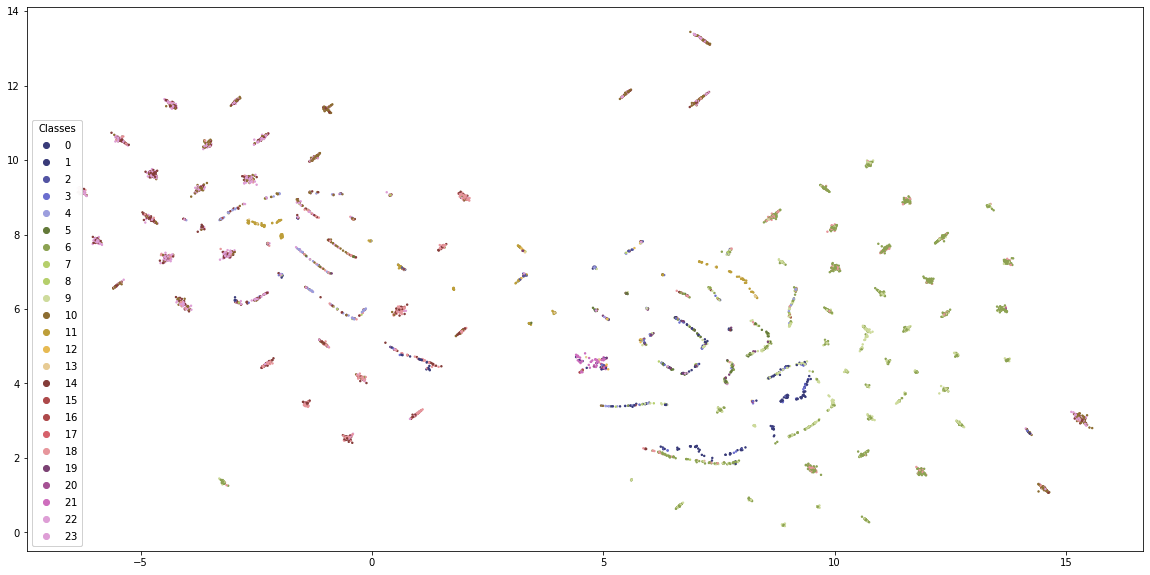

In [132]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
#scatter = ax.scatter(embedding[:,0], embedding[:,1], s=2, c=clusters, cmap='tab20b', alpha=1.0)
scatter = ax.scatter(uno, dos, s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=15),loc="lower left", title="Classes")
ax.add_artist(legend1)

In [ ]:
lgbm_data = df_new.copy()
for c in lgbm_data.select_dtypes(include='object'):
    lgbm_data[c] = lgbm_data[c].astype('category')

clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, lgbm_data, clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

clf_kp.fit(lgbm_data, clusters)

explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(lgbm_data)

shap.summary_plot(shap_values_kp, lgbm_data, plot_type="bar", plot_size=(15, 10))

## Silueta

In [133]:
silhouette_score(df_new, clusters)

ValueError: could not convert string to float: 'M'

# DBSCAN con MixPCA

In [135]:
df_numerical = df_adhoc[['Edades','PQRS 2020',
       'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea']]


df_numerical.head()

scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns)
df_numerical_scaled.head()

df_categorical = df_adhoc[['Genero', 'TipoAfiliado', 'Regionales', 'Departamento',
       'Municipios', 'Zonas', 'REGIMEN', 'AfilidoPAC', 'Multiquejoso', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud']]
df_categorical.head()

df_new = pd.concat([df_numerical_scaled, df_categorical], axis=1)
df_new.head()

,Edades,PQRS 2020,PortalWeb 2020,APP 2020,CallCenter 2020,OAA 2020,AsesorAClic 2020,ViveDigital 2020,IVR 2020,ChatEnLinea,...,REGIMEN,AfilidoPAC,Multiquejoso,mujerEnEdadFertil,categoriaNivelDeDigitalizacionOficial,Condicion_Cronica_idSalud,NivelRiesgo_idSalud,Discapacidad_idSalud,Etnia_idSalud,NivelEducativo_idSalud
0,-0.787255,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,SUBSIDIADO,NO,NO,SI,ALTO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
1,-0.635546,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,Contributivo,NO,NO,SI,ALTO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
2,-0.433267,-0.112592,1.642778,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,Contributivo,NO,NO,SI,ALTO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,PROFESIONAL
3,-0.584976,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,Contributivo,NO,NO,SI,ALTO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
4,1.892945,-0.112592,-0.159374,-0.128605,-0.207338,-0.305127,-0.036401,-0.025834,-0.204959,-0.142595,...,Contributivo,NO,NO,NO,MEDIO,CON CONDICION,GESTION BASICA,SIN DISCAPACIDAD,"NEGRO(A), MULATO(A), AFROCOLOMBIANO(A) O AFRO ...",BASICA PRIMARIA


In [136]:
famd = prince.FAMD(n_components=16,n_iter=5,copy=True,engine='auto',random_state=42)
df_new = df_new.dropna()
famd = famd.fit(df_new)
print('Inercia FAMD: ', sum(famd.explained_inertia_))
df_new_pca = famd.transform(df_new)
df_new_pca = pd.DataFrame(df_new_pca)
df_new_pca.columns = ['FAMD1','FAMD2','FAMD3','FAMD4','FAMD5','FAMD6','FAMD7','FAMD8', 'FAMD9','FAMD10','FAMD11','FAMD12','FAMD13','FAMD14','FAMD15','FAMD16']
df_new_pca.head()

Inercia FAMD:  0.07741218024275899


,FAMD1,FAMD2,FAMD3,FAMD4,FAMD5,FAMD6,FAMD7,FAMD8,FAMD9,FAMD10,FAMD11,FAMD12,FAMD13,FAMD14,FAMD15,FAMD16
0,-0.831409,0.529801,0.077667,0.516623,-0.054126,0.266042,0.586151,0.463329,-0.390025,-0.097939,-0.137332,0.127012,0.313837,-0.096465,0.320240,-0.069846
1,-0.459424,0.463378,-1.715678,-0.556069,0.600159,0.049117,0.048579,0.069487,-0.028540,-0.224913,-0.277563,-0.210132,-0.011397,0.380612,0.074741,0.218969
2,0.014583,0.656736,-2.166607,-0.405225,0.420344,0.312471,-0.801243,0.067598,-0.103508,-0.214300,0.228744,0.537491,-0.053280,0.143504,-0.121157,0.079903
3,-0.501326,0.787110,-0.101930,0.177188,-0.435168,0.583891,0.437901,-0.688186,0.959228,-0.119246,-0.109405,-0.717062,0.293988,-0.131939,1.283937,0.624559
4,0.712821,-1.653746,0.235999,-0.009989,-0.213712,-0.448636,-0.359013,0.487123,0.410644,0.467925,-0.234676,0.071159,0.291059,0.028240,-0.178972,-0.107561


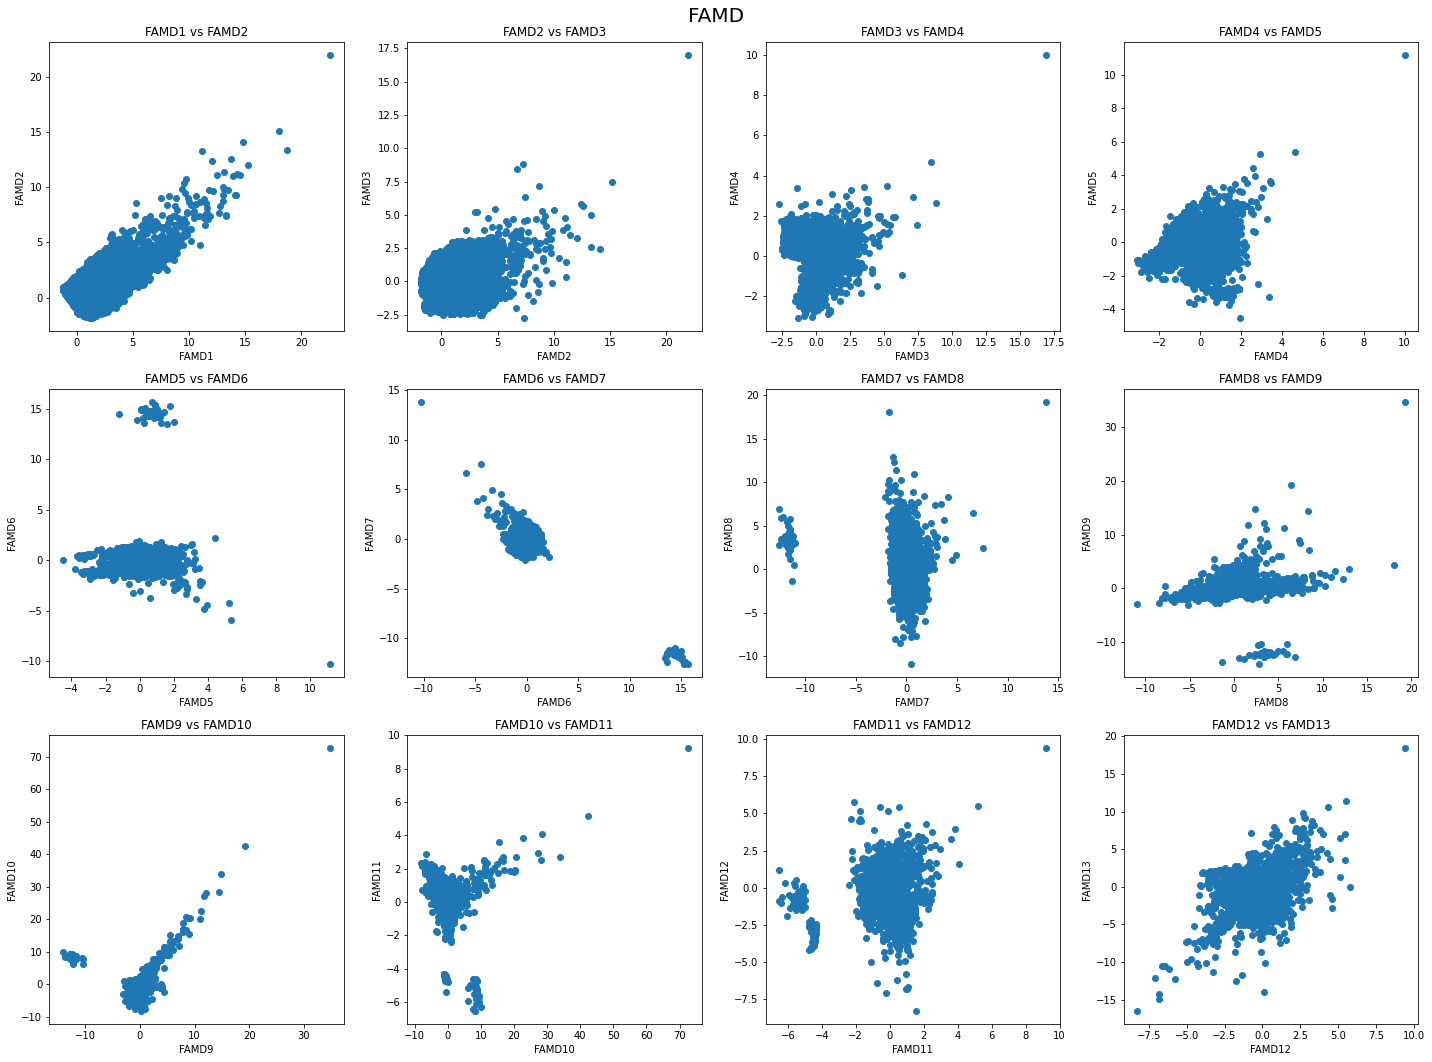

In [72]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('FAMD', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    ax.scatter(df_new_pca['FAMD'+str(i+1)], df_new_pca['FAMD'+str(i+2)])
    ax.set_xlabel('FAMD'+str(i+1))
    ax.set_ylabel('FAMD'+str(i+2))
    ax.set_title('FAMD'+str(i+1)+' vs FAMD'+str(i+2))


plt.tight_layout()
plt.show()

## Elbow

0.6026010257862111


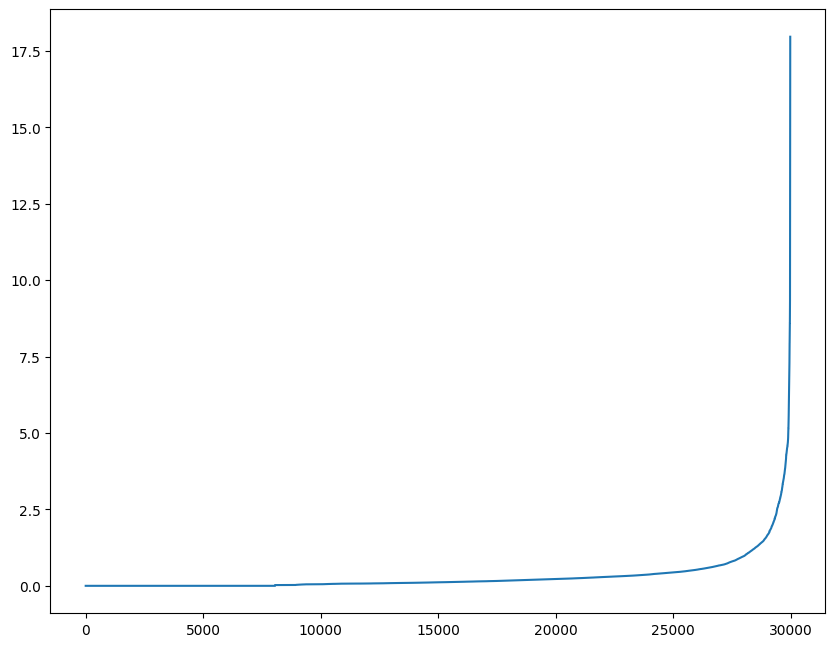

In [142]:
neigh = NearestNeighbors(n_neighbors = 4)
nbrs = neigh.fit(df_new_pca)
distancias, indices = nbrs.kneighbors(df_new_pca)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(distancias)

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])

In [143]:
db = DBSCAN(eps = distancias[knee.knee], min_samples=4)
clusters_std = db.fit_predict(df_new_pca)
print('Número de clusters: ', len(set(clusters_std)))

Número de clusters:  43


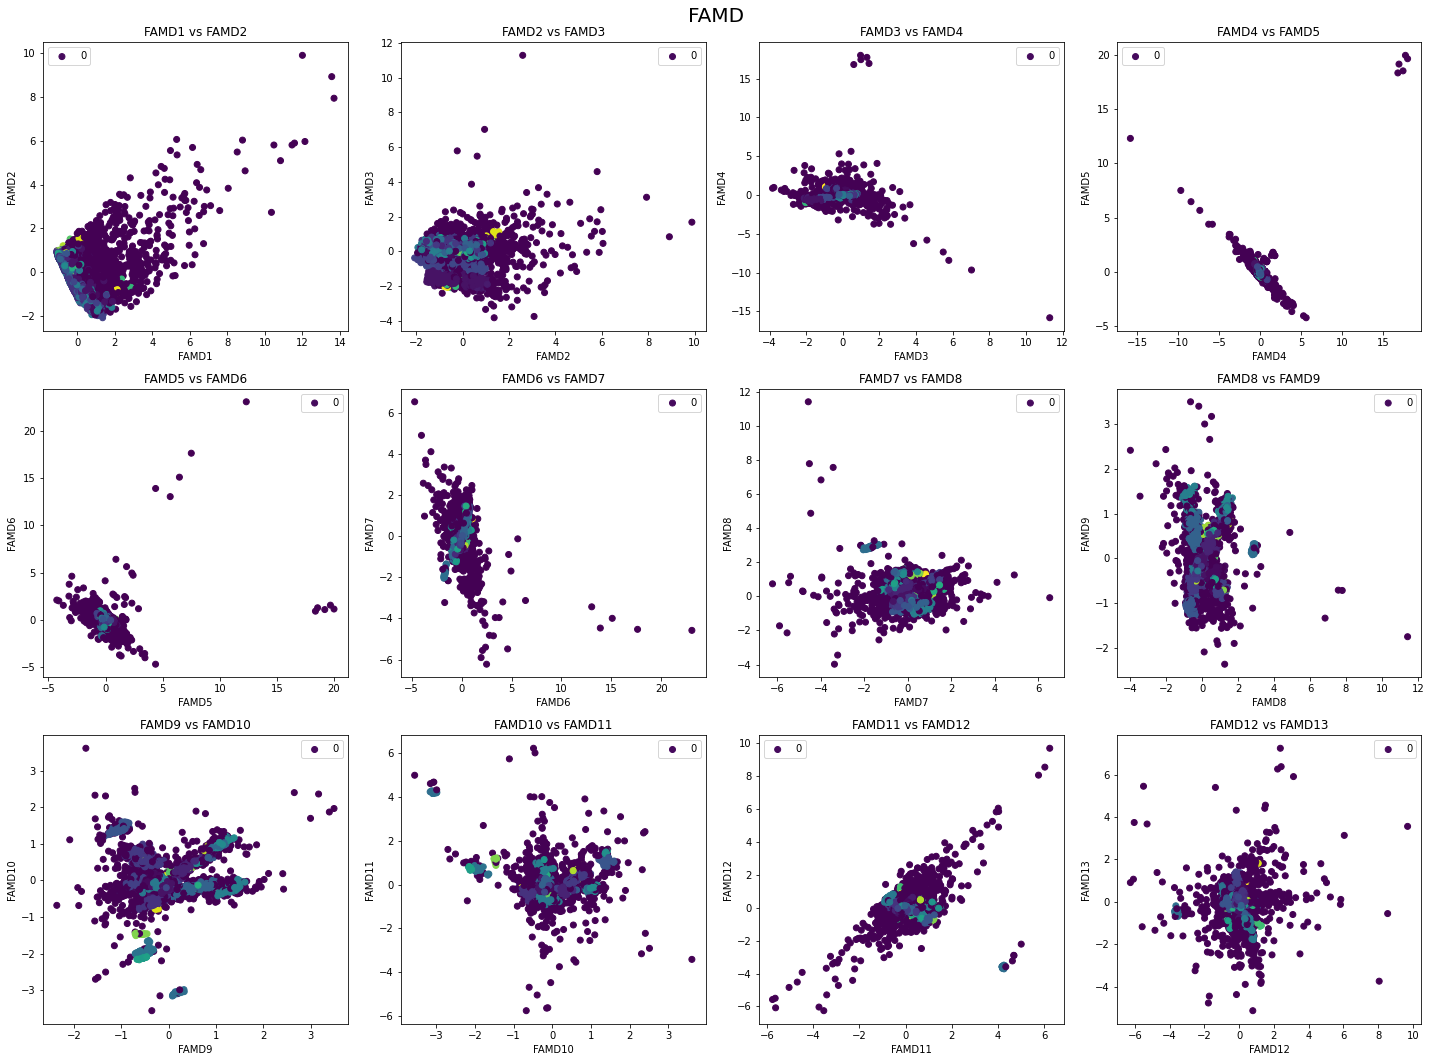

In [144]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('FAMD', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    ax.scatter(df_new_pca['FAMD'+str(i+1)], df_new_pca['FAMD'+str(i+2)], c=clusters_std)
    ax.set_xlabel('FAMD'+str(i+1))
    ax.set_ylabel('FAMD'+str(i+2))
    ax.set_title('FAMD'+str(i+1)+' vs FAMD'+str(i+2))
    ax.legend(clusters_std)


plt.tight_layout()
plt.show()

## Silueta

In [145]:
silhouette_score(df_new_pca, clusters_std, metric='euclidean')

0.11979707564104833

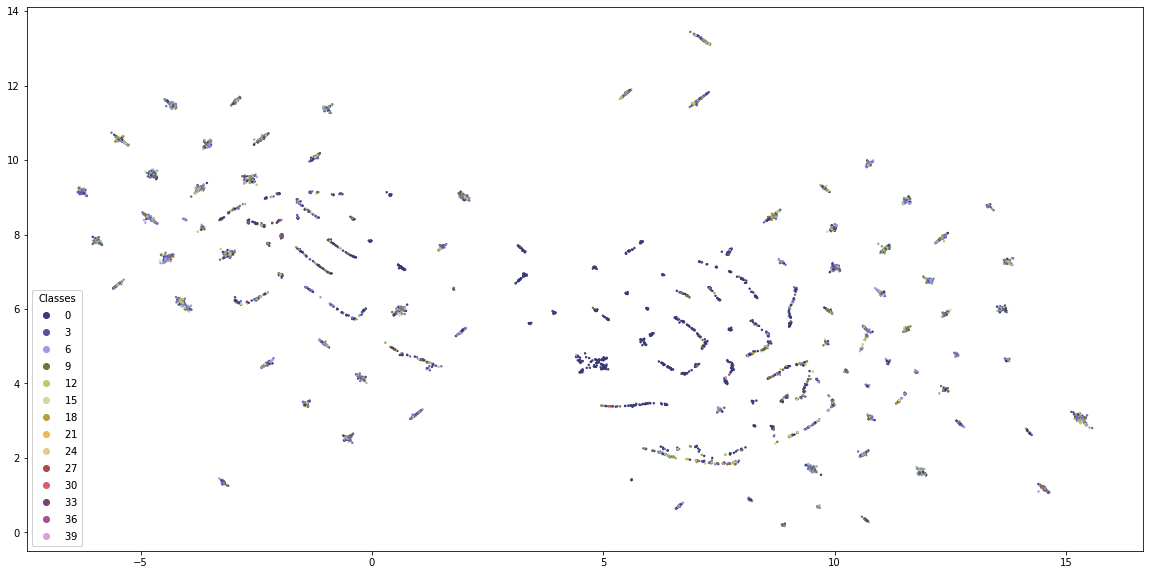

In [146]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
#scatter = ax.scatter(embedding[:,0], embedding[:,1], s=2, c=clusters, cmap='tab20b', alpha=1.0)
scatter = ax.scatter(uno, dos, s=2, c=clusters_std, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=15),loc="lower left", title="Classes")
ax.add_artist(legend1)

In [57]:
u = np.array([[1, 0.1], [-1, 0], [0.2, -1], [0.1, 1]])
v = np.array([[0.9, -0.2], [-1, -0.8], [1, -1], [1, 0.9], [-0.9, 1]])
A = u @ v.T
A


array([[ 0.88, -1.08,  0.9 ,  1.09, -0.8 ],
       [-0.9 ,  1.  , -1.  , -1.  ,  0.9 ],
       [ 0.38,  0.6 ,  1.2 , -0.7 , -1.18],
       [-0.11, -0.9 , -0.9 ,  1.  ,  0.91]])